# Decision Tree Classification Model

In [9]:
from sklearn import tree
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
from KLS_Train_Test_Split import others_blamed_train, others_blamed_test, ke_train, ke_test

Fitting the decision tree model.

In [2]:
# Fit a decision tree model
tree_class = tree.DecisionTreeClassifier(random_state = 1)
tree_class = tree_class.fit(others_blamed_train, ke_train)

Using five fold cross-validation selection on the model.

In [3]:
five_fold_tree_select = cross_validate(estimator = tree_class, X = others_blamed_train, y = ke_train, cv = 5, return_estimator = True, return_train_score = True)
five_fold_tree_select

{'fit_time': array([0.00099468, 0.00099659, 0.00099993, 0.        , 0.00099874]),
 'score_time': array([0.00099969, 0.        , 0.00098133, 0.00099874, 0.        ]),
 'estimator': (DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1)),
 'test_score': array([0.45454545, 0.54545455, 0.63636364, 0.6       , 0.7       ]),
 'train_score': array([0.69047619, 0.71428571, 0.69047619, 0.6744186 , 0.6744186 ])}

The model was about 58.7% accurate.

In [4]:
# Find the mean and standard deviation of the decision tree model's test scores
tree_select_mean = five_fold_tree_select['test_score'].mean()

tree_select_std = five_fold_tree_select['test_score'].std()

# Print the results of the mean and standard deviation for the decision tree model's test scores
print('Decision Tree 5 fold cv results (Accuracy) %.3f +/- %.3f'%(tree_select_mean, tree_select_std))

Decision Tree 5 fold cv results (Accuracy) 0.587 +/- 0.083


After adjusting the class weight parameter to weigh the True values higher, the model improved to 62.2% accuracy.

In [5]:
# Fit a decision tree model
tree_class2 = tree.DecisionTreeClassifier(class_weight = {1: 5}, random_state = 1)
tree_class2 = tree_class2.fit(others_blamed_train, ke_train)

five_fold_tree_select2 = cross_validate(estimator = tree_class2, X = others_blamed_train, y = ke_train, cv = 5, return_estimator = True, return_train_score = True)

# Find the mean and standard deviation of the decision tree model's test scores
tree_select_mean2 = five_fold_tree_select2['test_score'].mean()

tree_select_std2 = five_fold_tree_select2['test_score'].std()

# Print the results of the mean and standard deviation for the decision tree model's test scores
print('Decision Tree 5 fold cv results (Accuracy) %.3f +/- %.3f'%(tree_select_mean2, tree_select_std2))

Decision Tree 5 fold cv results (Accuracy) 0.622 +/- 0.066


The decision tree continually asked if the value of the samples were less than or equal to 0.5, essentially asking if they were False.  The decision tree began with 53 samples of NEPRA and moved on to one outcome of Tehreeki Insaaf of 27 samples and one outcome of Sui Gas with 26 samples, and then moved on to 2 different outcomes of Sui Gas and one outcome of Tehreeki Insaaf.  One outcome of Sui Gas resulted in a final outcome in the third level.  Four additional final outcomes branched from Sui Gas in the fourth level, while two final outcomes branched from Tehreeki Insaaf in the fourth level. 

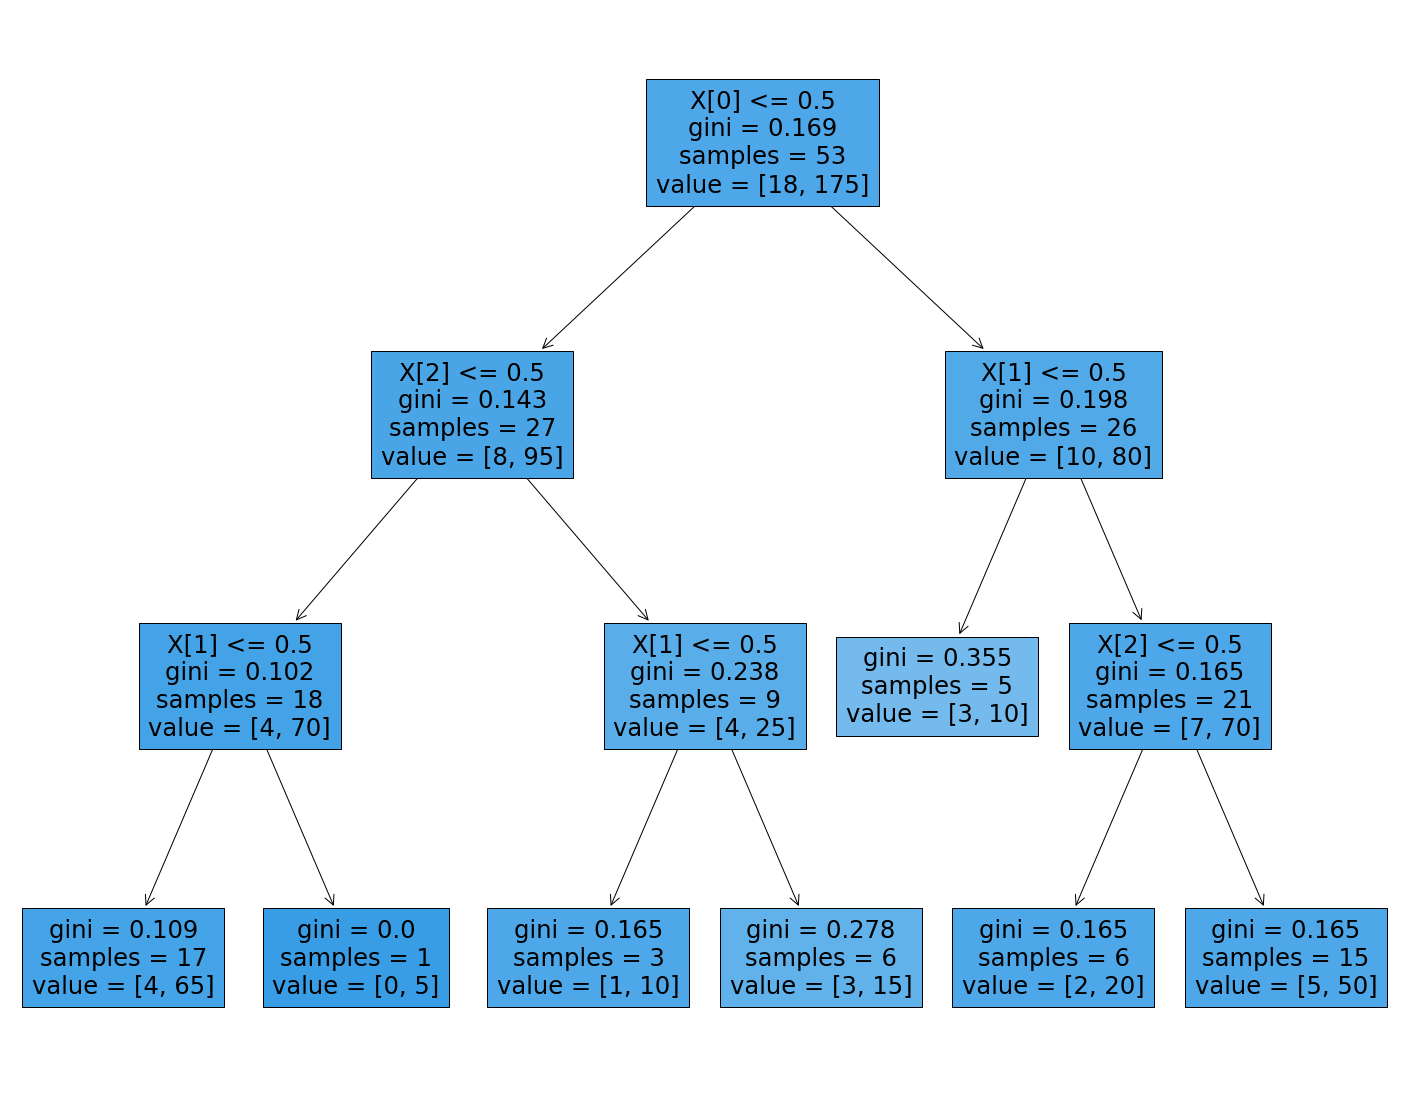

In [6]:
# Plotting the decision tree model
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(tree_class2, filled = True)

The decision tree model predicted that all of the below scenarios would result in Karachi Electric being blamed.

In [7]:
print(f'No others blamed: {tree_class2.predict([[0, 0, 0]])}')
print(f'Just NEPRA blamed: {tree_class2.predict([[1, 0, 0]])}')
print(f'Just SUI Gas blamed: {tree_class2.predict([[0, 1, 0]])}')
print(f'Just Tehreeki Insaaf blamed: {tree_class2.predict([[0, 0, 1]])}')

No others blamed: [1]
Just NEPRA blamed: [1]
Just SUI Gas blamed: [1]
Just Tehreeki Insaaf blamed: [1]


According to the decision tree model, there is an 86% probability that Karachi Electric will be blamed if nobody else is blamed, a 95% probability if only NEPRA is blamed, a 94% probability if only Sui Gas is blamed, and a 77% probability if only Tehreeki Insaaf is blamed.

In [8]:
print(f'No others blamed: {tree_class2.predict_proba([[0, 0, 0]])}')
print(f'Just NEPRA blamed: {tree_class2.predict_proba([[1, 0, 0]])}')
print(f'Just Sui Gas blamed: {tree_class2.predict_proba([[0, 1, 0]])}')
print(f'Just Tehreeki Insaaf blamed: {tree_class2.predict_proba([[0, 0, 1]])}')

No others blamed: [[0.05797101 0.94202899]]
Just NEPRA blamed: [[0.23076923 0.76923077]]
Just Sui Gas blamed: [[0. 1.]]
Just Tehreeki Insaaf blamed: [[0.09090909 0.90909091]]
